# Observing reconstruction images by Repelling Convolutional Auto-Encoder.

This notebook demonstrates that the Convolutional Auto-Encoder can learn images and reconstruct its. Image data set for this demo is the [Weizmann horse dataset](https://avaminzhang.wordpress.com/2012/12/07/%E3%80%90dataset%E3%80%91weizmann-horses/).

Firstly, import Python and Cython modules for building Convolutional Auto-Encoder.

In [1]:
from pydbm.cnn.convolutionalneuralnetwork.convolutionalautoencoder.repelling_convolutional_auto_encoder import RepellingConvolutionalAutoEncoder
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
from pydbm.cnn.featuregenerator.image_generator import ImageGenerator

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction

from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.loss.kl_divergence import KLDivergence
from pydbm.optimization.optparams.adam import Adam

In [3]:
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2

In [4]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

Set hyperparameters of feature points in image data.

In [5]:
batch_size = 20
channel = 3
height = 100
width = 100
scale = 1e-05

Instantiate objects and call the method.

In [6]:
conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=IdentityFunction(),
        filter_num=batch_size,
        channel=channel,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

conv2 = ConvolutionLayer2(
    ConvGraph2(
        activation_function=IdentityFunction(),
        filter_num=batch_size,
        channel=batch_size,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

opt_params = Adam()
opt_params.weight_decay_lambda = 0.1

cnn = RepellingConvolutionalAutoEncoder(
    layerable_cnn_list=[
        conv1, 
        conv2
    ],
    epochs=100,
    batch_size=batch_size,
    learning_rate=1e-15,
    learning_attenuate_rate=0.1,
    attenuate_epoch=100,
    computable_loss=KLDivergence(),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15,
    save_flag=False
)

feature_generator = ImageGenerator(
    epochs=100,
    batch_size=batch_size,
    training_image_dir="../../../../Downloads/rgb/",
    test_image_dir="../../../../Downloads/rgb/",
    seq_len=None,
    gray_scale_flag=False,
    wh_size_tuple=(100, 100),
    norm_mode="z_score"
)

In [7]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

Execute learning.

In [8]:
cnn.learn_generated(feature_generator)

CNN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 1.2163313583876657e-13 Test: 1.2237025586719737e-13
Best params are updated.
Epoch: 2
Loss: 
Training: 1.2092580034189107e-13 Test: 1.2240264268339808e-13
Best params are updated.
Epoch: 3
Loss: 
Training: 1.2129213093433825e-13 Test: 1.2098889472288854e-13
Epoch: 4
Loss: 
Training: 1.2189375105114072e-13 Test: 1.2088885268777761e-13
Best params are updated.
Epoch: 5
Loss: 
Training: 1.2085602337254426e-13 Test: 1.212527874936632e-13
Epoch: 6
Loss: 
Training: 1.2125882890511264e-13 Test: 1.2156062653884086e-13
Epoch: 7
Loss: 
Training: 1.222055365233504e-13 Test: 1.215471022254698e-13
Epoch: 8
Loss: 
Training: 1.2164312831410797e-13 Test: 1.2106907387174499e-13
Epoch: 9
Loss: 
Training: 1.2139393198978078e-13 Test: 1.202730644937962e-13
Epoch: 10
Loss: 
Training: 1.211856560787465e-13 Test: 1.2175199427333606e-13
Epoch: 11
Loss: 
Training: 1.21416612960818e-13 Test: 1.219743858248949e-13
Rolling mean of Loss (Windo

Epoch: 52
Loss: 
Training: 1.2112037566481323e-13 Test: 1.208467356615288e-13
Rolling mean of Loss (Window is 10): 
Training: 1.213541790831516e-13 Test: 1.2135576191976958e-13
Epoch: 53
Loss: 
Training: 1.217144317455929e-13 Test: 1.2130266453863947e-13
Rolling mean of Loss (Window is 10): 
Training: 1.2129588901128813e-13 Test: 1.2131264775530837e-13
Epoch: 54
Loss: 
Training: 1.2154865077232194e-13 Test: 1.2171608822345558e-13
Rolling mean of Loss (Window is 10): 
Training: 1.21347493345743e-13 Test: 1.2131834388760992e-13
Epoch: 55
Loss: 
Training: 1.2116542595747288e-13 Test: 1.2141702171422916e-13
Rolling mean of Loss (Window is 10): 
Training: 1.2139438985802456e-13 Test: 1.2136379162821319e-13
Epoch: 56
Loss: 
Training: 1.2247783501510548e-13 Test: 1.2066076578778482e-13
Rolling mean of Loss (Window is 10): 
Training: 1.2134766427946613e-13 Test: 1.2136273798966698e-13
Epoch: 57
Loss: 
Training: 1.214088883842566e-13 Test: 1.222406518659033e-13
Rolling mean of Loss (Window is 1

Epoch: 98
Loss: 
Training: 1.225313168253978e-13 Test: 1.2207867404488027e-13
Rolling mean of Loss (Window is 10): 
Training: 1.2125886011794304e-13 Test: 1.2139758471772133e-13
Epoch: 99
Loss: 
Training: 1.2158644027792423e-13 Test: 1.2082325780992326e-13
Rolling mean of Loss (Window is 10): 
Training: 1.21377092606658e-13 Test: 1.2143405313773253e-13
Epoch: 100
Loss: 
Training: 1.2114129200258726e-13 Test: 1.2120918739976949e-13
Rolling mean of Loss (Window is 10): 
Training: 1.2133704179490266e-13 Test: 1.2142553556940275e-13
Best params are saved.
end. 


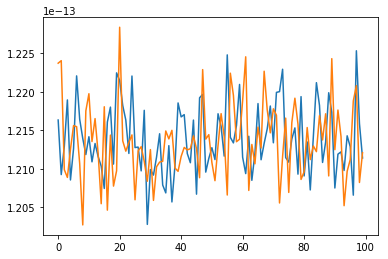

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.plot(cnn.verificatable_result.logs_df.train_loss, label="Train Loss")
plt.plot(cnn.verificatable_result.logs_df.test_loss, label="Test Loss")
plt.show()
plt.close()

## Extract reconstruction images.

The object `cnn` which is-a `ConvolutionalAutoEncoder` has a method `inference` to be able to reconstruct observed data points as feature points. The input test data and reconstructed data are as follows.

test data:


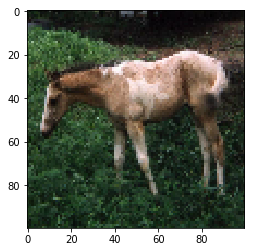

reconstructed data:


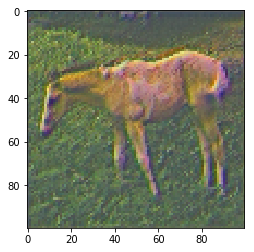

test data:


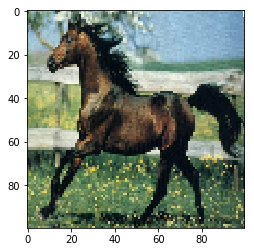

reconstructed data:


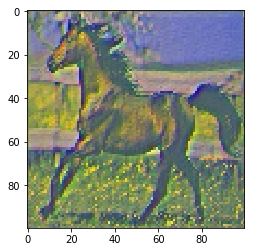

test data:


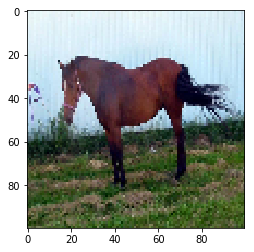

reconstructed data:


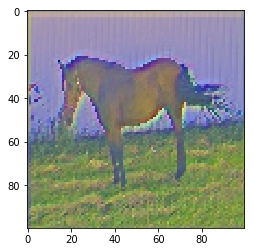

test data:


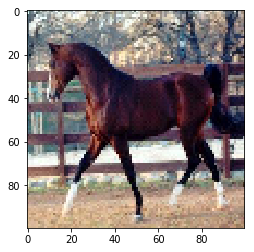

reconstructed data:


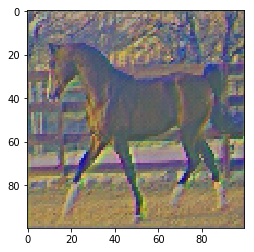

test data:


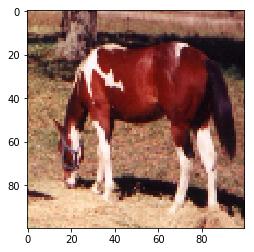

reconstructed data:


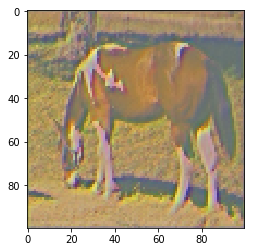

test data:


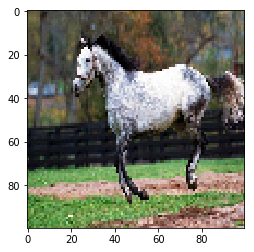

reconstructed data:


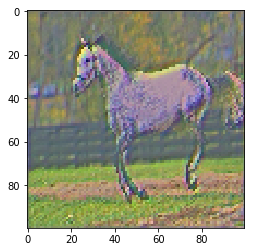

test data:


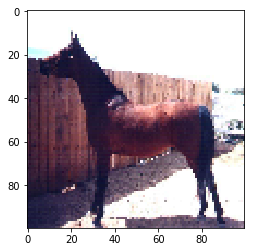

reconstructed data:


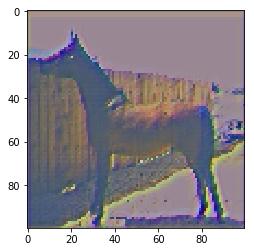

test data:


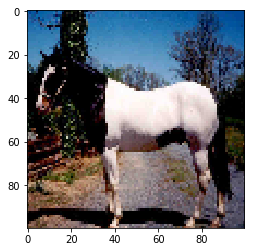

reconstructed data:


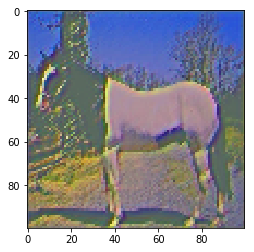

test data:


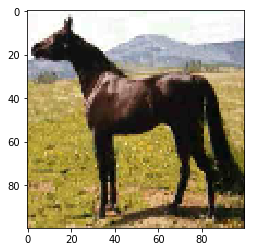

reconstructed data:


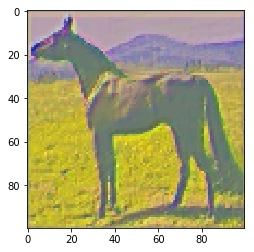

test data:


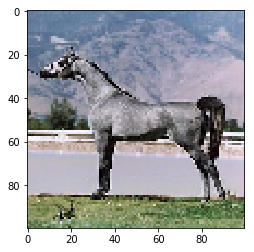

reconstructed data:


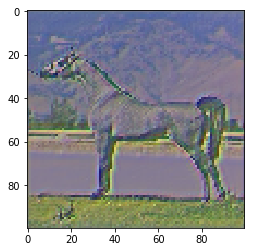

test data:


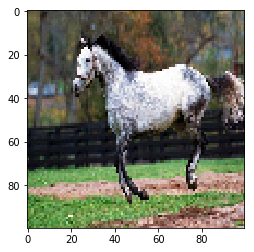

reconstructed data:


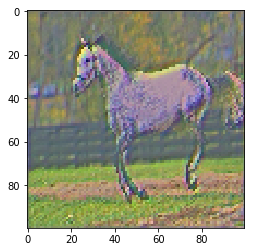

test data:


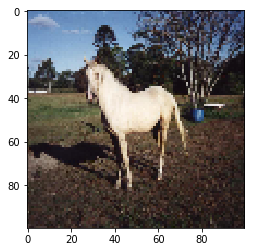

reconstructed data:


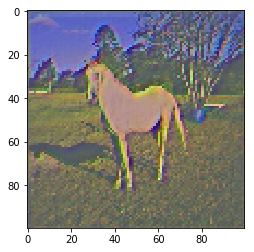

test data:


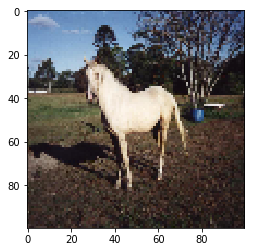

reconstructed data:


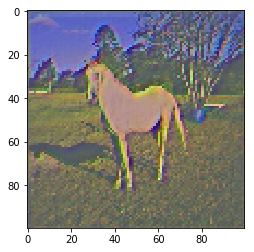

test data:


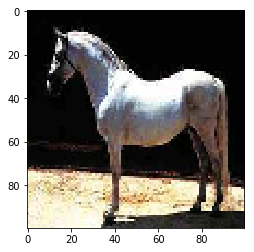

reconstructed data:


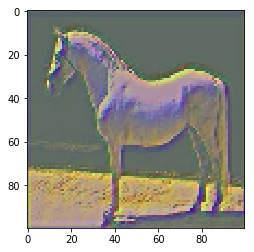

test data:


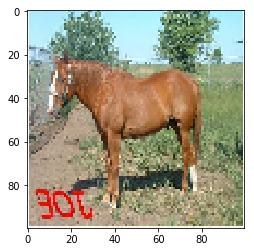

reconstructed data:


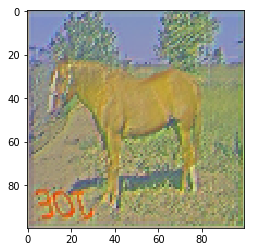

test data:


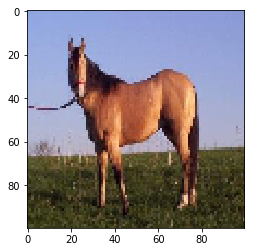

reconstructed data:


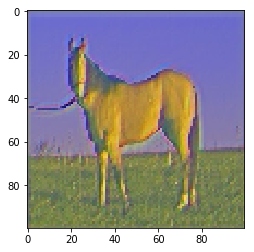

test data:


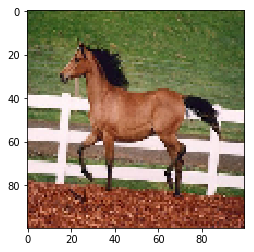

reconstructed data:


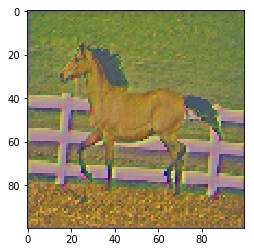

test data:


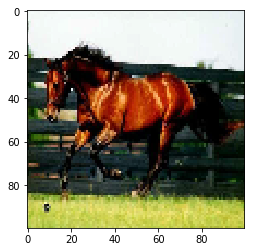

reconstructed data:


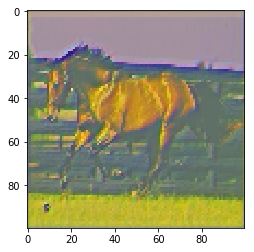

test data:


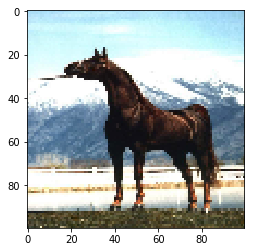

reconstructed data:


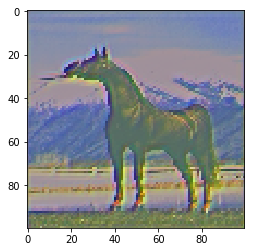

test data:


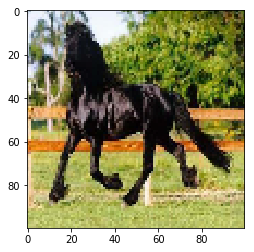

reconstructed data:


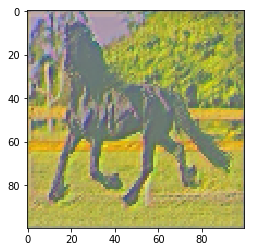

In [10]:


def plot(arr):
    arr = 255 * (arr - arr.min()) / (arr.max() - arr.min())
    arr = arr.transpose(1, 2, 0).astype(np.uint8)
    plt.imshow(arr)
    plt.show()
    plt.close()

test_len = 0
test_limit = 1

test_arr_list = []
rec_arr_list = []
for batch_observed_arr, batch_target_arr, test_batch_observed_arr, test_batch_target_arr in feature_generator.generate():
    test_len += 1
    result_arr = cnn.inference(test_batch_observed_arr)
    for batch in range(test_batch_target_arr.shape[0]):
        test_batch_target_arr = (test_batch_target_arr - test_batch_target_arr.min()) / (test_batch_target_arr.max() - test_batch_target_arr.min())
        print("test data:")
        plot(test_batch_target_arr[batch])
        test_arr_list.append(test_batch_target_arr[batch][0])
        print("reconstructed data:")
        plot(result_arr[batch])
    if test_len >= test_limit:
        break
